# Predicting with Time Series

Below, we review some of the basics in exploring and modeling with time series data.  Our data is from stock tickers for Amazon.  We will target predicting the **close** feature or closing price of the stock on a given date.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
amzn = pd.read_csv('../resource/asnlib/publicdata/AMZN_2006-01-01_to_2018-01-01.csv')

In [3]:
amzn.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


### Question I: `to_ts_format`

In [61]:
###GRADED
def to_ts_format(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace = True)
    return df

In [24]:
to_ts_format(amzn)
    
    '''
    This function takes a DataFrame with a Date
    column.  We return a DataFrame with the Date feature
    as a datetime object and set to the index of the DataFrame.
    '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
Date      3019 non-null datetime64[ns]
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 165.2+ KB
None
DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3019, freq=None)


In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Question 2: Closing Price by Month



In [4]:
amzn = pd.read_csv('../resource/asnlib/publicdata/amzn_prepared.csv', index_col = 0, parse_dates = True)
amzn.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [5]:
###GRADED
###QUESTION 2
###Compute the average Closing price by quarter.
###Save your results to the variable amzn_mean_close_by_quarter.
###HINT: Use the .resample() method.
amzn_mean_close_by_quarter = amzn.resample('Q')['Close'].mean()
#print(amzn_mean_close_by_quarter)
###
### YOUR CODE HERE
###


In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Question 3: Moving Average

In [7]:
###GRADED
amzn_20day_mvg_avg = amzn['Close'].rolling(20).mean()
###
### YOUR CODE HERE
###


In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Question 4:  Stationarity

![](amzn_autocorr.png)

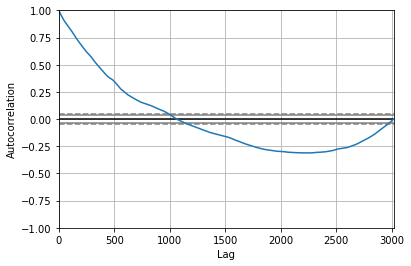

In [10]:
###GRADED
###QUESTION 4
###Based on the Autocorrelation plot of AMZN's closing
###prices, believe the time series is stationary.
###Assign a boolean answer to ans_4 below.
from pandas.plotting import autocorrelation_plot
data = amzn['Close']
autocorrelation_plot(data)
ans_4 = False
###
### YOUR CODE HERE
###


In [11]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Question 5: Augmented Dickey Fuller test



In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(amzn.Close)[1]

1.0

In [14]:
adfuller(amzn.Close.diff().dropna())[1]

1.0983139936571346e-17

In [15]:
###GRADED
###QUESTION 5
###Interpret  the results of the augmented Dickey-Fuller test
###by selecting all valid statements below.  Assign your solutions
###as strings in the list ans_5 (i.e. ans_5 = ['a', 'c']):
###a) We fail to reject the null hypothesis for the original series x
###b) We reject the null hypothesis for the first difference of the original series x
###c) neither the original or diff'd version of the series is stationary 
###d) We fail to reject the null hypothesis that the first difference is stationary.
ans_5 = ['a','b']
###
### YOUR CODE HERE
###


In [16]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Question 6: Train/Test Split

Below, we create a training and testing set for our models.  As discussed in the lectures, we want to create these splits in order rather than a random selection of observations.  For us, we will use data starting in **2016** for our training data, and the final ten days of data as our testing data.

In [17]:
###GRADED
###Training Data starts in 2016
###Testing Data is last 10 observations in dataset.
###Both should be pandas series type indexed by date.
###The last date in train should be '2017-12-14'.

amzn_train = amzn['2016':'2017-12-14']
series = pd.Series(amzn_train['Close'], index=amzn_train.index)

train = series[:]
print(train)

amzn_test = amzn[-10:]
series2 = pd.Series(amzn_test['Close'], index=amzn_test.index)

test = series2[:]
print(test)

###
### YOUR CODE HERE
###


Date
2016-01-04     636.99
2016-01-05     633.79
2016-01-06     632.65
2016-01-07     607.94
2016-01-08     607.05
2016-01-11     617.74
2016-01-12     617.89
2016-01-13     581.81
2016-01-14     593.00
2016-01-15     570.18
2016-01-19     574.48
2016-01-20     571.77
2016-01-21     575.02
2016-01-22     596.38
2016-01-25     596.53
2016-01-26     601.25
2016-01-27     583.35
2016-01-28     635.35
2016-01-29     587.00
2016-02-01     574.81
2016-02-02     552.10
2016-02-03     531.07
2016-02-04     536.26
2016-02-05     502.13
2016-02-08     488.10
2016-02-09     482.07
2016-02-10     490.48
2016-02-11     503.82
2016-02-12     507.08
2016-02-16     521.10
               ...   
2017-11-02    1094.22
2017-11-03    1111.60
2017-11-06    1120.66
2017-11-07    1123.17
2017-11-08    1132.88
2017-11-09    1129.13
2017-11-10    1125.35
2017-11-13    1129.17
2017-11-14    1136.84
2017-11-15    1126.69
2017-11-16    1137.29
2017-11-17    1129.88
2017-11-20    1126.31
2017-11-21    1139.49
2017-

In [18]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Question 7: Building the Autoregressive Model

Adjust the `ARIMA` instance below to build an autoregression model using your training data from **Question 6**.  This model should work on the first difference of the original closing price,  and use one prior term or an order 1 `AR` model.  

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
ar = ARIMA(train, order = (1, 1, 0))
model = ar.fit() #fit the model here
###
### YOUR CODE HERE
###


In [21]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Question 8: Making Predictions

In [46]:
###GRADED
###QUESTION 8
###Use your fit model instance to generate a forecast for the 
###next 10 days closing prices.  (HINT: Use the .forecast() method!)
###Assign your solution as a series of predictions with appropriate index to ar_predictions below.
forecast = model.forecast(steps = 10)

ar_predictions = pd.Series(forecast[0], index = series2.index)
print(ar_predictions)


###
### YOUR CODE HERE
###


Date
2017-12-15    1175.514920
2017-12-18    1176.610038
2017-12-19    1177.702278
2017-12-20    1178.794466
2017-12-21    1179.886653
2017-12-22    1180.978841
2017-12-26    1182.071028
2017-12-27    1183.163216
2017-12-28    1184.255403
2017-12-29    1185.347590
dtype: float64


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**Plotting Predictions**

![](predictions.png)

### Question 9: MSE and RMSE

In [57]:
###GRADED
###Question 9
###Compute the Mean Squared Error and 
###Root Mean Squared Error on the testing data.
test_9 = pd.DataFrame(test)
pred_df = pd.DataFrame(ar_predictions)
pred_df['Close'] = test_9['Close']
pred_df['squared_error'] = (pred_df['Close'] - pred_df[0])**2
print(pred_df)

mse = np.mean(pred_df['squared_error'])
rmse = np.sqrt(mse)

print(mse, rmse)
###
### YOUR CODE HERE
###


                      0    Close  squared_error
Date                                           
2017-12-15  1175.514920  1179.14      13.141204
2017-12-18  1176.610038  1190.58     195.159849
2017-12-19  1177.702278  1187.38      93.658308
2017-12-20  1178.794466  1177.62       1.379370
2017-12-21  1179.886653  1174.76      26.282575
2017-12-22  1180.978841  1168.36     159.235143
2017-12-26  1182.071028  1176.76      28.207020
2017-12-27  1183.163216  1182.26       0.815798
2017-12-28  1184.255403  1186.10       3.402539
2017-12-29  1185.347590  1169.47     252.097872
77.33796785592963 8.794200808255951


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Question 10: ARIMA Model

In [69]:
###GRADED
###Question 10
###Adjust the ARIMA Model below to fit a model with 1 AR term
###on the first difference of the training data with 1 moving average term.
ar = ARIMA(train, order = (1, 1, 1))
model = ar.fit() 
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Question 11: Evaluating Results MSE and RMSE

In [59]:
###GRADED
###QUESTION 11
###Use your fit ARIMA model to evaluate the Mean Squared Error
###and Root Mean Squared Error on the test dataset.
forecast2 = model.forecast(steps = 10)
ar2_predictions = pd.Series(forecast2[0], index = series2.index)
pred_df = pd.DataFrame(ar2_predictions)
pred_df['Close'] = test_9['Close']
pred_df['squared_error'] = (pred_df['Close'] - pred_df[0])**2
print(pred_df)


mse = np.mean(pred_df['squared_error'])
rmse = np.sqrt(mse)
print(mse, rmse)
###
### YOUR CODE HERE
###


                      0    Close  squared_error
Date                                           
2017-12-15  1175.514920  1179.14      13.141204
2017-12-18  1176.610038  1190.58     195.159849
2017-12-19  1177.702278  1187.38      93.658308
2017-12-20  1178.794466  1177.62       1.379370
2017-12-21  1179.886653  1174.76      26.282575
2017-12-22  1180.978841  1168.36     159.235143
2017-12-26  1182.071028  1176.76      28.207020
2017-12-27  1183.163216  1182.26       0.815798
2017-12-28  1184.255403  1186.10       3.402539
2017-12-29  1185.347590  1169.47     252.097872
77.33796785592963 8.794200808255951


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### What's Next

As we saw in the lectures, these values for parameters `p, q`, and `d` might not be just right.  We would like to also consider some near values in the vicinity of our already tested.  You may want to run a grid search over some different parameters -- comparing the performance on predicting your test data.